In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import mdirac as md

In [2]:
N1=1000
K1=25

In [3]:
### Setup mesh
dr=2.*math.pi/K1 
cell=dr*np.array([[1.,0.],[-0.5,0.5*np.sqrt(3)]])
rmesh = md.Parallelogram(N1,cell)
kmesh = rmesh.reciprocal_cell()
kmesh.circle = kmesh.get_circle()

In [4]:
### Calculate quasiparticle states and energies
E,U=md.eighT(kmesh.circle)
dE=E[:,1]-E[:,0]

In [5]:
### Calculate dipole matrix elements
csxv = md.cov_matrix_elements(md.sx,U)
rcv=csxv/dE

In [6]:
### Calculate chi0
omega=np.linspace(1.e-10,3.,1000)
eta=2.e-2
factor=kmesh.vcell/(2.*math.pi)**2  
chi0=md.get_chi(factor,omega+1j*eta,dE,rcv)

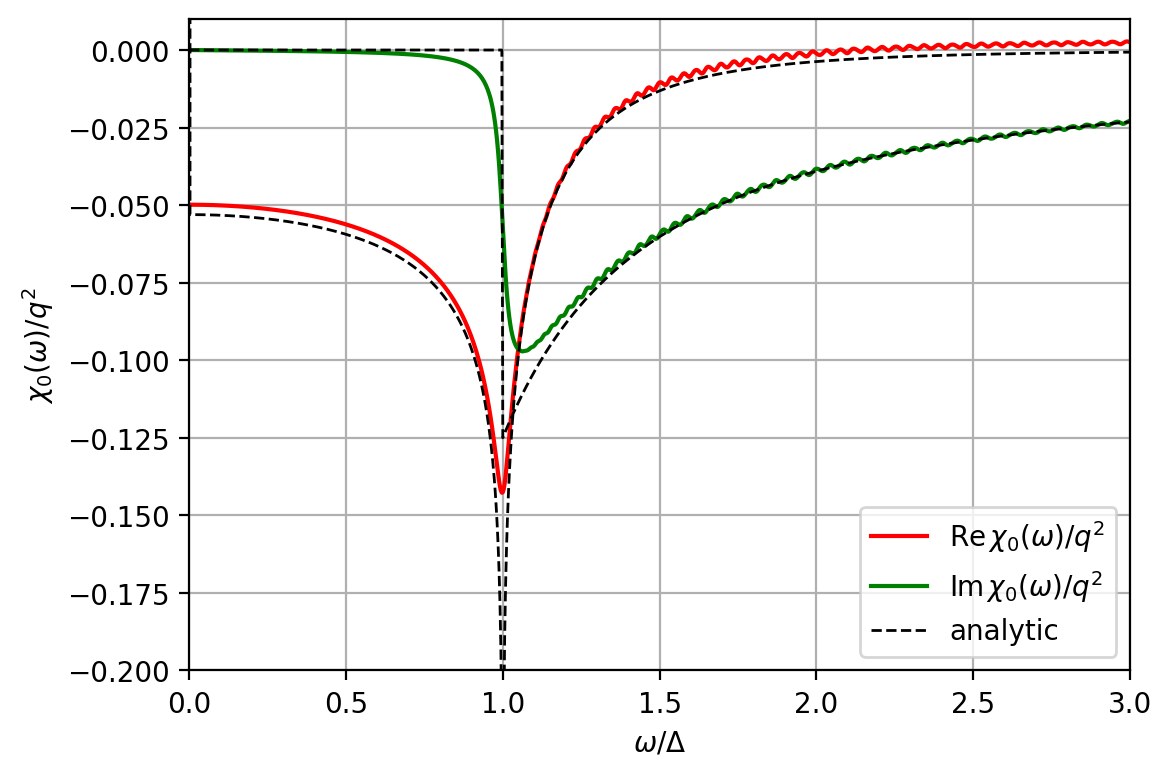

In [7]:
fig,ax=plt.subplots(dpi=100)
ax.plot(omega,chi0.real,'r',label=r'${\rm Re}\,\chi_0(\omega)/q^2$')
ax.plot(omega,chi0.imag,'g',label=r'${\rm Im}\,\chi_0(\omega)/q^2$')
ax.plot(omega,md.chi0(omega).real,'k--',label='analytic',lw=1)
ax.plot(omega,md.chi0(omega).imag,'k--',lw=1)
ax.set_xlim([omega[0],omega[-1]])
ax.set_ylim([-0.2,0.01])
ax.set_xlabel(r'$\omega/\Delta$')
ax.set_ylabel(r'$\chi_0(\omega)/q^2$')
ax.grid()
ax.legend(loc='lower right')
fig.tight_layout()
#plt.savefig('chi0.jpg',dpi=150)